# Dimensionality Reduction
- Manifold Learning: Multidimensional Scaling (MSD), Locally Linear Embedding (LLE), and Isometric Mapping (IsoMap).
- Principal Component Analysis (PCA): unsupervised method for dimensionality reducion in data. learning about the relationship between the x and y values, then to predict the value y from the x values. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. The information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.
- Other dimensionality reduction techniques
    - Random Projections: sklearn.random_projection
    - t-Distributed Stochastic Neighbor Embedding (t-SNE): try to keep similar instance close and dissimilar instance apart. mostly use for visualization
    - Linear Discriminant Analysis (LDA): is a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
## data consists 8x8 pixel images, meaning that they are 64-dimensional. 
## project from 64 to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)
projected.shape

(1797, 2)

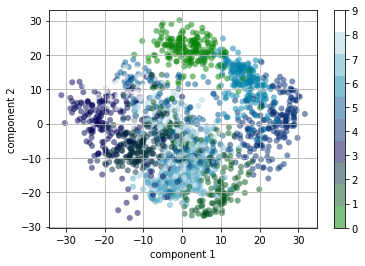

In [6]:
# plot new data
plt.scatter(projected[:, 0], projected[:, 1], 
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('ocean', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

## Choosing the number of components
This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

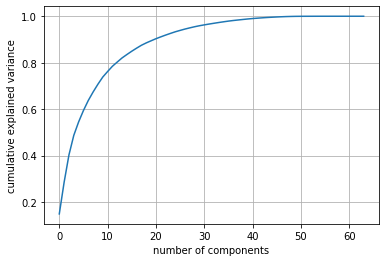

In [10]:
pca = PCA().fit(digits.data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [55]:
d = np.argmax(cumsum >= 0.95) + 1
d

## Which 28 components that cover up to 95% of information, and more than 50 components will cover to 100%

29

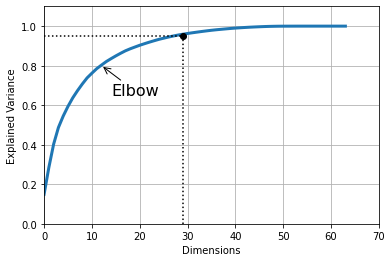

In [56]:
# explained variance as a function of the number of dimensions
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 70, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(12, 0.80), xytext=(14, 0.65),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [36]:
## get the number of principal components by directly set n_components between 0 and 1.0, indicating the ratio of variance we wish to preserve.
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(digits.data)
pca.n_components_

29

In [37]:
X_reduced.shape

(1797, 29)

In [38]:
## PCA compression
## Inverse the dimensionality reduction
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(1797, 64)

## Kernel PCA
To perform complex nonlinear projections for dimentionality reduction, which some kernel functions supporting such as Linear kernel, RBF kernel, and Sigmoid kernel

## Selecting a Kernel and Tuning Hyperparameters
Using GridSearch() to select the kernel and hyperparameters that lead to the best performance. 

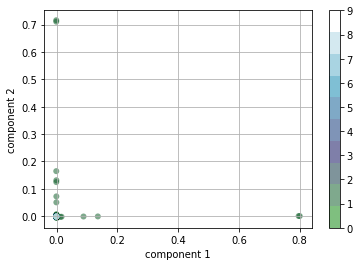

In [40]:
# using kernel PCA
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(digits.data)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('ocean', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [46]:
## Searching best kernel and hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X = digits.data
y = digits.target

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [48]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [53]:
## apply best model's params
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03, fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)
X_reversed = rbf_pca.inverse_transform(X_reduced)

In [54]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_reversed)

18.74398890554693